In [58]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [61]:
dir_name = "/home/flaessig/Continual-Learning-Benchmark/outputs/lr-sweep-batch_size=512-size_hidden=20-reg_coef=100/"
lrs = [1 / 10**(i / 2) for i in range(3, 5, 1)]

results = {'bp': {}, 'ewc': {}}

for name in results.keys():
    results[name]['means'] = []
    results[name]['stds'] = []
    for lr in lrs:
        file_name = dir_name + f"{name}/{lr=}.log"
        with open(file_name) as f:
            f = f.readlines()
        summary = f[-1]
        print(summary)
        results[name]['means'].append(float(re.search('mean: (.*) std', summary).group(1)))
        results[name]['stds'].append((re.search('std: (.*)', summary).group(1)))

reg_coef: 0.0 mean: 62.54054122971324 std: 0.0

reg_coef: 0.0 mean: 62.022943565729555 std: 0.0

reg_coef: 100.0 mean: 61.8194328404132 std: 0.0

reg_coef: 100.0 mean: 64.18960449277392 std: 0.0



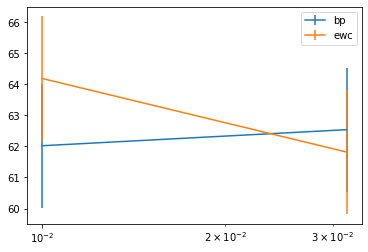

In [64]:
for name, val in results.items():
    #plt.errorbar(lrs, val['means'], yerr=val['stds'] * len(means))
    plt.errorbar(lrs, val['means'], yerr=[2] * len(val['means']), label=name)
plt.legend()
plt.xscale('log')